In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import nltk
from nltk.corpus import names
import random
from sklearn.metrics import precision_recall_fscore_support


In [172]:
keywords= [
"act now",
"apply now",
"apply online",
"call free",
"call now",
"can't live without",
"do it today",
"don't delete",
"don't hesitate",
"for instant access",
"for Only",
"get it now",
"get started now",
"great offer",
"info you requested",
"information you requested",
"instant",
"limited time",
"new customers only",
"now only",
"offer expires",
"once in lifetime",
"one time",
"order now",
"order today",
"please read",
"special promotion",
"supplies are limited",
"take action now",
"time limited",
"urgent",
"while supplies last",
"free",
"cancel at any time",
"copy accurately",
"give it away",
"print form signature",
"print out and fax",
"see for yourself",
"sign up free today",
"affordable",
"bargain",
"beneficiary",
"best price",
"big bucks",
"cash",
"cents on the dollar",
"check",
"claims",
"collect",
"compare rates",
"cost",
"credit",
"credit bureaus",
"discount",
"easy terms",
"fast cash",
"for just $",
"hidden assets",
"hidden charges",
"income",
"incredible deal",
"insurance",
"investment",
"loans",
"lowest price",
"million dollars",
"money",
"mortgage",
"no cost",
"no fees",
"one hundred percent free",
"only $",
"pennies a day",
"price",
"profits",
"pure profit",
"refinance",
"save $",
"save big money",
"save up to",
"serious cash",
"subject to credit",
"they keep your money — no refund!",
"unsecured credit",
"unsecured debt",
"US dollars"]
scam = ["Fraud","Phishing","Commercial Spam"]

In [173]:
df= pd.read_csv('phishing_data_by_type.csv')
df.head()

,Subject,Text,Type
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,Fraud
1,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",Fraud
2,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,Fraud
3,from Mrs.Johnson,Goodday Dear\n\n\nI know this mail will come t...,Fraud
4,Co-Operation,FROM MR. GODWIN AKWESI\nTEL: +233 208216645\nF...,Fraud


In [174]:

def sus_words_search(keywords, email):
    count=0;
    email= email.lower()
    for ele in keywords:
        if ele in email:
            count=count+1
             
    return {'trigger_words' : str(count)}
    
    
    
def ScamOrNot(words, scam_statues ):
    res= any(ele in scam_statues for ele in words)
    if res == 1 : return  'Scam' 
    else: return  'Not_Scam' 

print(sus_words_search( keywords, "URGent act now!" ))
#print(ScamOrNot( scam, 'Fraud longer word' ))





{'trigger_words': '2'}


In [175]:
temp= df.Text.to_list()
temp0=df.Type.to_list()
temp1= [ScamOrNot(scam, ele) for (ele) in temp0]
#print(temp1)
#emails_text = zip(temp,temp1)
emails_text =  list(zip(temp, temp1))


In [176]:
featuresets = [(sus_words_search(keywords, ele1), ele2) for (ele1, ele2) in emails_text ]
#print(featuresets)

train_set, test_set = train_test_split(featuresets,  random_state=0)

#print(train_set)
#print(test_set)
classifier = nltk.NaiveBayesClassifier.train(train_set)

              

In [177]:
print(classifier.classify(sus_words_search(keywords,'urgent')))
print(classifier.classify(sus_words_search(keywords,'sdfghjhgfdfghjhgfdfghjkjhgfdfghjkjhgfghjhgfgh')))
print(classifier.classify(sus_words_search(keywords,'hello')))


Scam
Scam
Scam


In [178]:

y_true = list(list(zip(*test_set))[1])
print(y_true)


test_features = list(list(zip(*test_set))[0])
#print("test: ",test_features)

y_predict = [classifier.classify(features) for features in test_features]
#print("predict: ",y_predict," true : ",y_true, )

(p,r,f,s) = precision_recall_fscore_support(y_true, y_predict)

print("p: ",p,"r: ",r,"f: ",f,s)


['Scam', 'Scam', 'Not_Scam', 'Scam', 'Not_Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Not_Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Not_Scam', 'Scam', 'Scam', 'Scam', 'Not_Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Scam', 'Not_Scam', 'Scam', 'Scam', 'Scam', 'Not_Scam', 'Not_Scam', 'Scam', 'Not_Scam', 'Not_Scam']
p:  [0.   0.75] r:  [0. 1.] f:  [0.         0.85714286] [10 30]


C:\Users\James\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


emails that have no trigger words are more than twice as likely to be a valid email
emails that have 2 or more trigger words in them are 3 times as likely to be spam
emails that have 1 trigger words in them are as likely to be spam as not.



In [179]:

classifier.show_most_informative_features(5)

Most Informative Features
           trigger_words = '2'              Scam : Not_Sc =      3.8 : 1.0
           trigger_words = '3'              Scam : Not_Sc =      3.1 : 1.0
           trigger_words = '0'            Not_Sc : Scam   =      2.2 : 1.0
           trigger_words = '1'              Scam : Not_Sc =      1.0 : 1.0


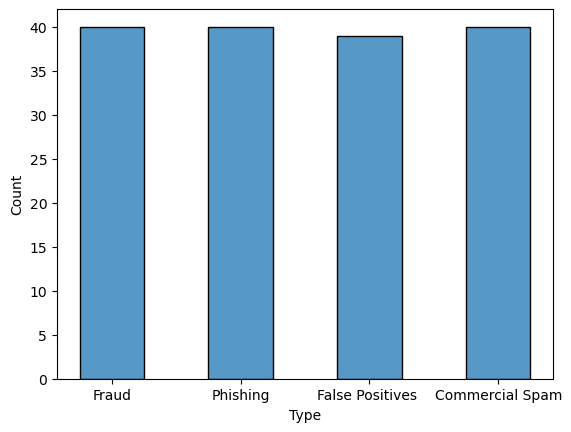

In [180]:
histtype=sns.histplot(data=df.Type, shrink=.5)
